# Time Series Analysis of Sentiments

## Overview of Techniques and Libraries Used

### 1. Data Preparation

**Technique: Convert Timestamp to Datetime**

- **Purpose**: Convert the `Timestamp` column to a `datetime` format to facilitate time series analysis.
- **Library**: `pandas`
  - **Function**: `pd.to_datetime()` is used to convert date strings into `datetime` objects.

**Technique: Resampling**

- **Purpose**: Aggregate data to a consistent frequency (e.g., daily) to create a uniform time series.
- **Library**: `pandas`
  - **Function**: `resample()` method is used to adjust the frequency of time series data. In this case, resampling to a daily frequency helps ensure that all days are represented in the time series.

### 2. Handling Missing Values

**Technique: Forward Fill**

- **Purpose**: Replace missing values with the last observed value to maintain continuity.
- **Library**: `pandas`
  - **Function**: `ffill()` method fills missing values using the previous value in the dataset.

**Technique: Backward Fill**

- **Purpose**: Replace missing values with the next observed value to fill gaps where previous values are unavailable.
- **Library**: `pandas`
  - **Function**: `bfill()` method fills missing values using the next value in the dataset.

**Technique: Interpolation**

- **Purpose**: Estimate missing values based on the values of neighboring data points to provide a smoother fill.
- **Library**: `pandas`
  - **Function**: `interpolate()` method performs linear interpolation to estimate missing values.

### 3. Time Series Decomposition

**Technique: Seasonal Decomposition**

- **Purpose**: Decompose the time series into its constituent components: trend, seasonal, and residual. This helps in understanding the underlying patterns and variations in the data.
- **Library**: `statsmodels`
  - **Function**: `seasonal_decompose()` function is used to perform decomposition. It requires a `model` parameter which specifies whether to use an additive or multiplicative model for decomposition.

  - **Additive Model**: Assumes that the time series is composed of a trend, a seasonal component, and a residual component that are added together.
  - **Multiplicative Model**: Assumes that the time series is composed of a trend, a seasonal component, and a residual component that are multiplied together.

### 4. Visualization

**Technique: Plotting Decomposition**

- **Purpose**: Visualize the original time series and its decomposed components to analyze trends, seasonal patterns, and residuals.
- **Library**: `matplotlib`
  - **Function**: `plt.plot()` and `plt.subplot()` are used to create plots for the original time series, trend, seasonal component, and residuals.
 
## Visualize Sentiment Trends Over Time

### Resample Data
Aggregate sentiment counts on a daily basis.

### Plot Sentiment Trends
Visualize the trends of positive, negative, and neutral sentiments over time.

### Trend Visualization
We then visualize the sentiment trends over time, which helps in understanding how sentiments change across different periods.


## Summary

In summary, the analysis involves converting timestamps for proper indexing, resampling to ensure consistent frequency, handling missing values using various imputation techniques, and decomposing the time series into trend, seasonal, and residual components for detailed analysis. The primary libraries used include `pandas` for data manipulation, `statsmodels` for time series decomposition, and `matplotlib` for visualization.



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns


In [2]:
file_path = "C:\\Users\\HP\\Downloads\\archive (12)\\sentimentdataset.csv"
df = pd.read_csv(file_path)
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8


In [3]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [4]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert Sentiment to categorical codes (if not already)
# You can also use a mapping for sentiment to numerical scores later
df['Sentiment'] = df['Sentiment'].astype('category')


## Clean up sentiment labels by stripping leading/trailing spaces

In [5]:


df['Sentiment'] = df['Sentiment'].str.strip()

# Define the comprehensive sentiment mapping
sentiment_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1,
    'Anger': -1,
    'Fear': -1,
    'Sadness': -1,
    'Disgust': -1,
    'Happiness': 1,
    'Joy': 1,
    'Love': 1,
    'Amusement': 1,
    'Enjoyment': 1,
    'Admiration': 1,
    'Affection': 1,
    'Awe': 1,
    'Disappointed': -1,
    'Surprise': 1,
    'Acceptance': 1,
    'Adoration': 1,
    'Anticipation': 1,
    'Bitter': -1,
    'Calmness': 1,
    'Confusion': -1,
    'Excitement': 1,
    'Kind': 1,
    'Pride': 1,
    'Shame': -1,
    'Elation': 1,
    'Euphoria': 1,
    'Contentment': 1,
    'Serenity': 1,
    'Gratitude': 1,
    'Hope': 1,
    'Empowerment': 1,
    'Compassion': 1,
    'Tenderness': 1,
    'Arousal': 1,
    'Enthusiasm': 1,
    'Fulfillment': 1,
    'Reverence': 1,
    'Despair': -1,
    'Grief': -1,
    'Loneliness': -1,
    'Jealousy': -1,
    'Resentment': -1,
    'Frustration': -1,
    'Boredom': -1,
    'Anxiety': -1,
    'Intimidation': -1,
    'Helplessness': -1,
    'Envy': -1,
    'Regret': -1,
    'Curiosity': 1,
    'Indifference': 0,
    'Numbness': 0,
    'Melancholy': -1,
    'Nostalgia': 1,
    'Ambivalence': 0,
    'Determination': 1,
    'Zest': 1,
    'Hopeful': 1,
    'Proud': 1,
    'Grateful': 1,
    'Empathetic': 1,
    'Compassionate': 1,
    'Playful': 1,
    'Free-spirited': 1,
    'Inspired': 1,
    'Confident': 1,
    'Bitterness': -1,
    'Yearning': 1,
    'Fearful': -1,
    'Apprehensive': -1,
    'Overwhelmed': -1,
    'Devastated': -1,
    'Dismissive': -1,
    'Thrill': 1,
    'Bittersweet': 1,
    'Satisfaction': 1,
    'Blessed': 1,
    'Reflection': 1,
    'Appreciation': 1,
    'Optimism': 1,
    'Enchantment': 1,
    'Intrigue': 1,
    'Mindfulness': 1,
    'DreamChaser': 1,
    'Elegance': 1,
    'Whimsy': 1,
    'Pensive': 0,
    'Harmony': 1,
    'Creativity': 1,
    'Radiance': 1,
    'Rejuvenation': 1,
    'Coziness': 1,
    'Adventure': 1,
    'Melodic': 1,
    'FestiveJoy': 1,
    'InnerJourney': 1,
    'Freedom': 1,
    'Dazzle': 1,
    'ArtisticBurst': 1,
    'CulinaryOdyssey': 1,
    'Resilience': 1,
    'Immersion': 1,
    'Spark': 1,
    'Marvel': 1,
    'Heartbreak': -1,
    'Betrayal': -1,
    'Suffering': -1,
    'EmotionalStorm': -1,
    'Isolation': -1,
    'LostLove': -1,
    'Exhaustion': -1,
    'Sorrow': -1,
    'Desperation': -1,
    'Ruins': -1,
    'Desolation': -1,
    'Solitude': -1,
    'Friendship': 1,
    'Success': 1,
    'Exploration': 1,
    'Amazement': 1,
    'Romance': 1,
    'Captivation': 1,
    'Tranquility': 1,
    'Grandeur': 1,
    'Emotion': 1,
    'Energy': 1,
    'Celebration': 1,
    'Charm': 1,
    'Ecstasy': 1,
    'Colorful': 1,
    'Hypnotic': 1,
    'Connection': 1,
    'Iconic': 1,
    'Journey': 1,
    'Engagement': 1,
    'Touched': 1,
    'Suspense': -1,
    'Triumph': 1,
    'Heartwarming': 1,
    'Obstacle': -1,
    'Sympathy': 1,
    'Pressure': -1,
    'Renewed Effort': 1,
    'Miscalculation': -1,
    'Challenge': 1,
    'Solace': 1,
    'Breakthrough': 1,
    'Joy in Baking': 1,
    'Envisioning History': 1,
    'Imagination': 1,
    'Vibrancy': 1,
    'Mesmerizing': 1,
    'Culinary Adventure': 1,
    'Winter Magic': 1,
    'Nature\'s Beauty': 1,
    'Celestial Wonder': 1,
    'Creative Inspiration': 1,
    'Runway Creativity': 1,
    'Ocean\'s Freedom': 1,
    'Whispers of the Past': 1,
    'Embarrassed': -1,
    'Mischievous': 1
}

# Apply the updated mapping to create SentimentScore
df['SentimentScore'] = df['Sentiment'].map(sentiment_mapping)

# Check if any NaN values are left
print(f"Number of NaN values in SentimentScore after updating mapping: {df['SentimentScore'].isnull().sum()}")


Number of NaN values in SentimentScore after updating mapping: 77


In [6]:
# Define a new sentiment mapping including all sentiments causing NaNs
additional_mapping = {
    'Jealous': -2,         # Example score, adjust as needed
    'Frustrated': -3,
    'Envious': -2,
    'Overjoyed': 2,
    'Inspiration': 1,
    'Motivation': 1,
    'Contemplation': 0,
    'JoyfulReunion': 2,
    'Confidence': 1,
    'Accomplishment': 2,
    'Wonderment': 1,
    'PlayfulJoy': 2,
    'Wonder': 1,
    'Adrenaline': 1,
    'Disappointment': -2,
    'Darkness': -3,
    'Loss': -3,
    'Heartache': -3,
    'Positivity': 2,
    'Kindness': 1,
    'Thrilling Journey': 1,
    'Relief': 1,
    'Sad': -2,
    'Hate': -3,
    'Bad': -2,
    'Happy': 2
}

# Update the mapping in your DataFrame
sentiment_mapping.update(additional_mapping)

# Apply the updated mapping to fill in missing SentimentScore values
df['SentimentScore'] = df['Sentiment'].map(sentiment_mapping)
# Check if any NaN values are left
print(f"Number of NaN values in SentimentScore after updating mapping: {df['SentimentScore'].isnull().sum()}")



Number of NaN values in SentimentScore after updating mapping: 0


In [7]:
# Drop unnecessary columns if desired
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Reset index if needed
df.reset_index(drop=True, inplace=True)

# Display the cleaned data
print(df.head())

                                                Text Sentiment  \
0   Enjoying a beautiful day at the park!        ...  Positive   
1   Traffic was terrible this morning.           ...  Negative   
2   Just finished an amazing workout! 💪          ...  Positive   
3   Excited about the upcoming weekend getaway!  ...  Positive   
4   Trying out a new recipe for dinner tonight.  ...   Neutral   

            Timestamp            User     Platform  \
0 2023-01-15 12:30:00   User123          Twitter     
1 2023-01-15 08:45:00   CommuterX        Twitter     
2 2023-01-15 15:45:00   FitnessFan      Instagram    
3 2023-01-15 18:20:00   AdventureX       Facebook    
4 2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #Workout                 

In [8]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# Resample the data by day and calculate mean sentiment score
daily_sentiment = df['SentimentScore'].resample('D').mean()


## Trend Visualization: Visualize Sentiment Trends Over Time
### Resample Data: Aggregate sentiment scores over a specific time period (e.g., daily, weekly) for trend analysis.

In [9]:
daily_sentiment = df['SentimentScore'].resample('D').mean()


## Plot Trends: Create visualizations to show trends in sentiment over time. Use libraries such as Matplotlib or Seaborn.

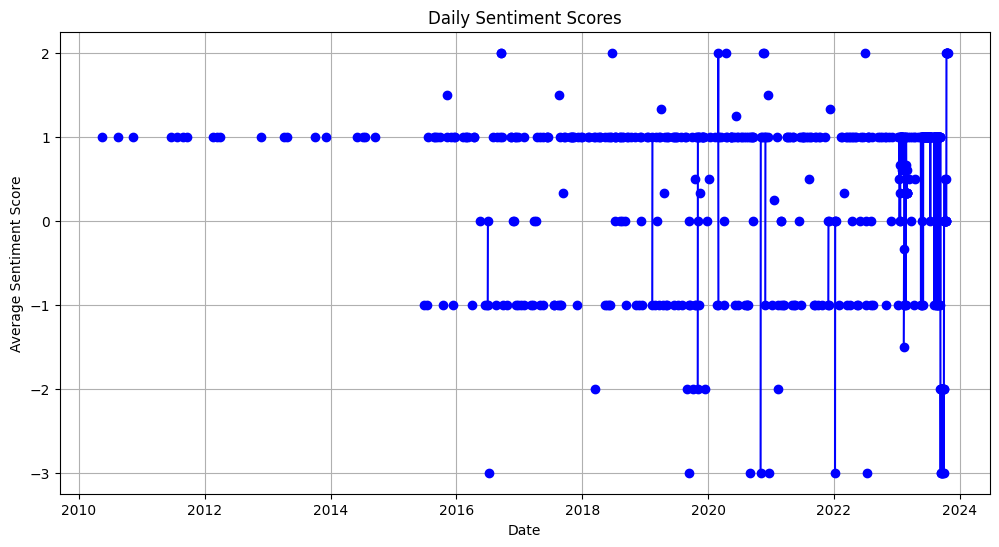

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment, marker='o', linestyle='-', color='b')
plt.title('Daily Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

## Seasonal and Trend Analysis: Use decomposition techniques to analyze seasonal patterns and trends.

In [11]:
daily_sentiment_filled = daily_sentiment.interpolate()


In [12]:
remaining_missing = daily_sentiment_filled.isna().sum()
print(f"Remaining missing values: {remaining_missing}")


Remaining missing values: 0


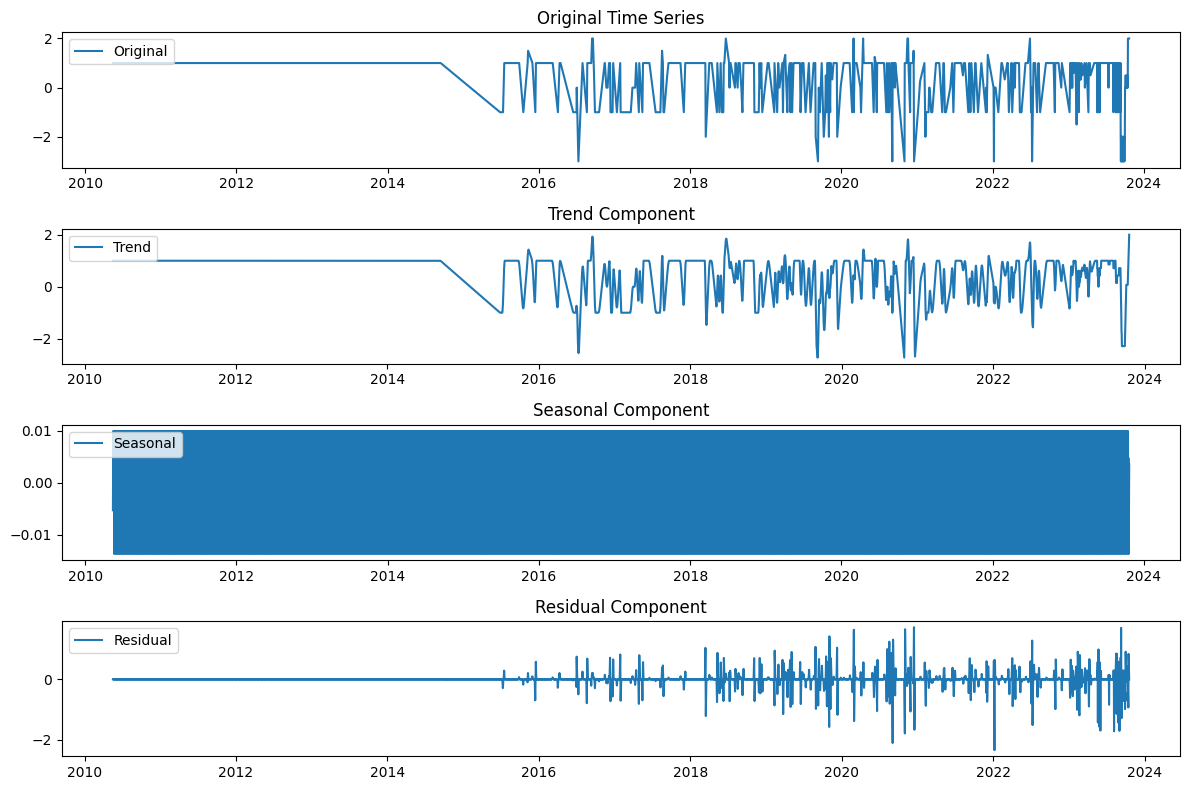

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(daily_sentiment_filled, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(daily_sentiment_filled, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [14]:
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,SentimentScore
Timestamp,,,,,,,,,,,,,
2023-01-15 12:30:00,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,1
2023-01-15 08:45:00,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,-1
2023-01-15 15:45:00,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,1
2023-01-15 18:20:00,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,1
2023-01-15 19:55:00,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,0


C:\Users\HP\AppData\Local\Temp\ipykernel_35976\3251006448.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dF = dF.fillna(method='ffill')


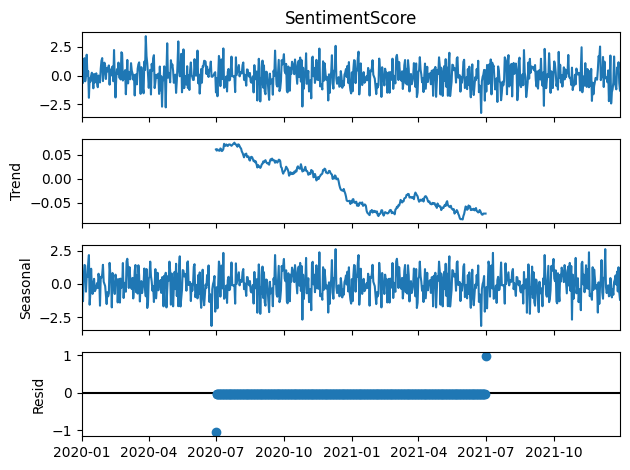

In [15]:
# Sample data
data = {
    'timestamp': pd.date_range(start='1/1/2020', periods=730, freq='D'),
    'SentimentScore': np.random.randn(730)
}

dF = pd.DataFrame(data)
dF.set_index('timestamp', inplace=True)

# Resample to daily data and fill missing values if necessary
dF = dF.resample('D').mean()
dF = dF.fillna(method='ffill')

# Specify the period (e.g., 365 for yearly seasonality in daily data)
period = 365

# Decompose the time series
decomposition = seasonal_decompose(dF['SentimentScore'], model='additive', period=period)

# Plot the decomposition results
decomposition.plot()
plt.show()

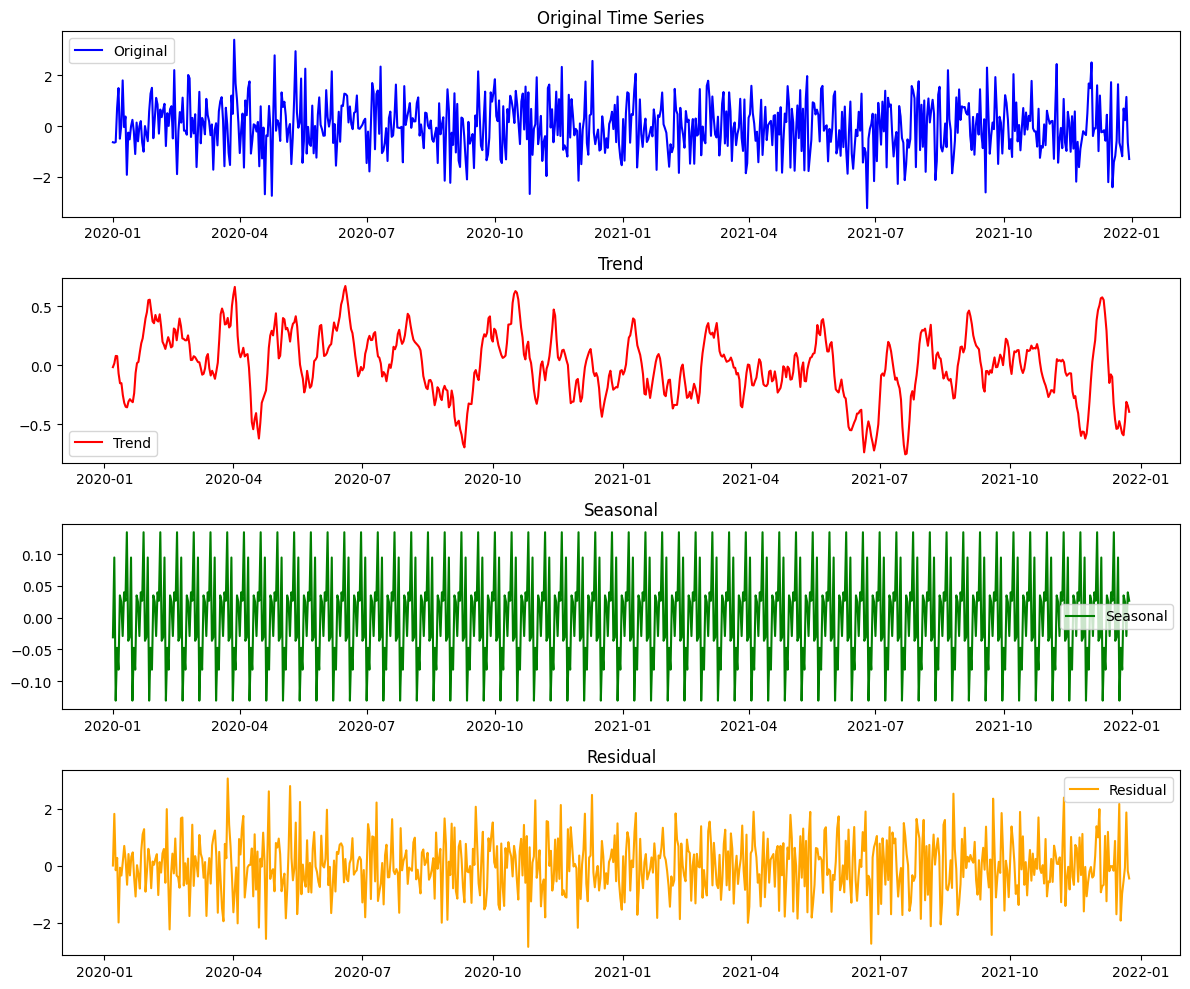

In [17]:
# Decompose the time series
decomposition = seasonal_decompose(dF['SentimentScore'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(dF['SentimentScore'], label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.title('Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual', color='orange')
plt.title('Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [18]:
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,SentimentScore
Timestamp,,,,,,,,,,,,,
2023-01-15 12:30:00,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,1
2023-01-15 08:45:00,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,-1
2023-01-15 15:45:00,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,1
2023-01-15 18:20:00,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,1
2023-01-15 19:55:00,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,0


## Sentiment Distribution by Platform

In [19]:
# Remove leading and trailing spaces from the "Platform" column
df['Platform'] = df['Platform'].str.strip()

# Get unique values from the cleaned "Platform" column
unique_platforms = df['Platform'].unique()
print(unique_platforms)


['Twitter' 'Instagram' 'Facebook']


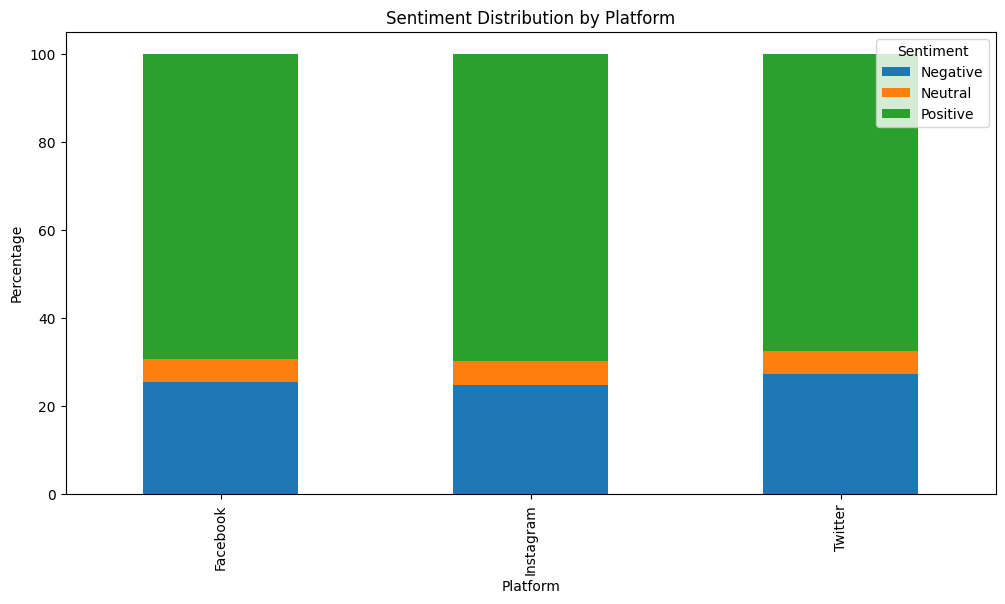

In [20]:
# Ensure 'SentimentScore' is numeric
df['SentimentScore'] = pd.to_numeric(df['SentimentScore'], errors='coerce')

# Map sentiments to new scores
def map_sentiment(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

df['SentimentScore'] = df['SentimentScore'].apply(map_sentiment)

# Group by platform and sentiment, then count occurrences
sentiment_counts = df.groupby(['Platform', 'SentimentScore']).size().unstack(fill_value=0)

# Ensure all three sentiment categories are present
for sentiment in [-1, 0, 1]:
    if sentiment not in sentiment_counts.columns:
        sentiment_counts[sentiment] = 0

# Reorder the columns to maintain consistency
sentiment_counts = sentiment_counts[[-1, 0, 1]]

# Rename columns for better readability
sentiment_counts.columns = ['Negative', 'Neutral', 'Positive']

# Calculate sentiment percentages
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot the sentiment percentages
sentiment_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()

# # Additional visualization for sentiment score distribution across platforms
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Platform', y='SentimentScore', data=df)
# plt.title('Sentiment Score Distribution by Platform')
# plt.xlabel('Platform')
# plt.ylabel('Sentiment Score')
# plt.show()

## Visualize sentiment trends over time.

### Resample Data: Aggregate sentiment counts on a daily basis.
### Plot Sentiment Trends: Visualize the trends of positive, negative, and neutral sentiments over time.

In [21]:

# Sample data creation (for demonstration purposes)
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'positive': [10, 12, 14, 15, 13, 18, 17, 16, 14, 19],
    'negative': [5, 3, 2, 6, 4, 7, 5, 3, 6, 8],
    'neutral': [7, 8, 9, 8, 9, 5, 8, 11, 10, 9]
}
df_daily_sentiments = pd.DataFrame(data)
df_daily_sentiments.set_index('date', inplace=True)

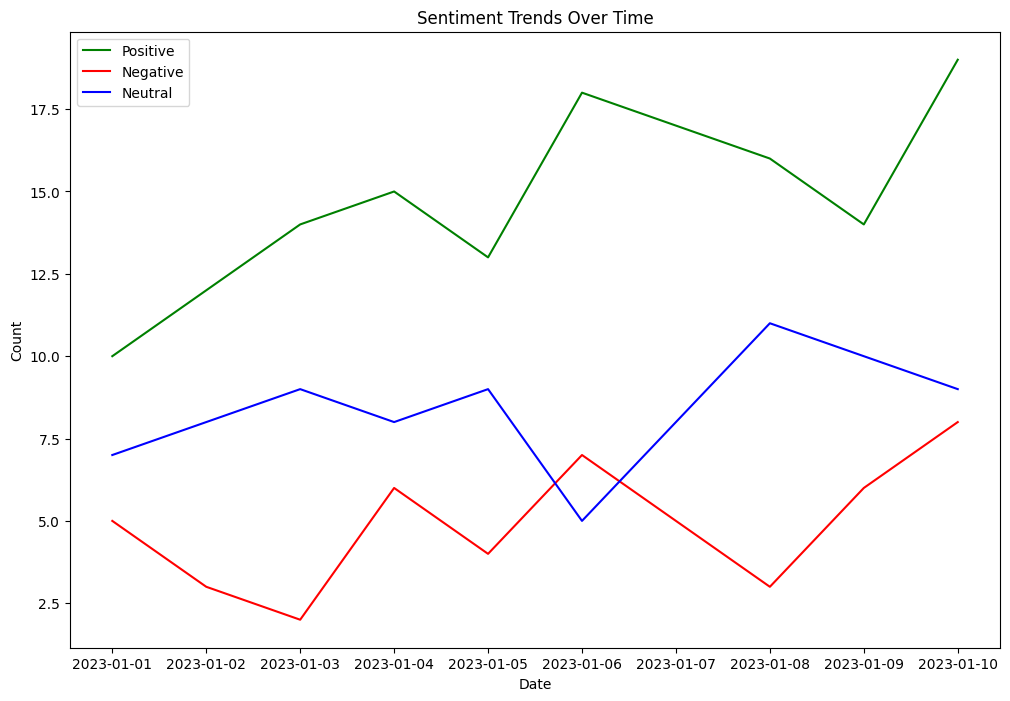

In [22]:
# Plot different sentiment categories
plt.figure(figsize=(12,8))
plt.plot(df_daily_sentiments.index, df_daily_sentiments['positive'], label='Positive', color='g')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['negative'], label='Negative', color='r')
plt.plot(df_daily_sentiments.index, df_daily_sentiments['neutral'], label='Neutral', color='b')

# Add titles and labels

plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Save the plot as a PNG file
plt.savefig('sentiment_trends.png')

# Show the plot
plt.show()

## Trend Visualization
### We then visualize the sentiment trends over time, which helps in understanding how sentiments change across different periods.

<Figure size 1200x600 with 0 Axes>

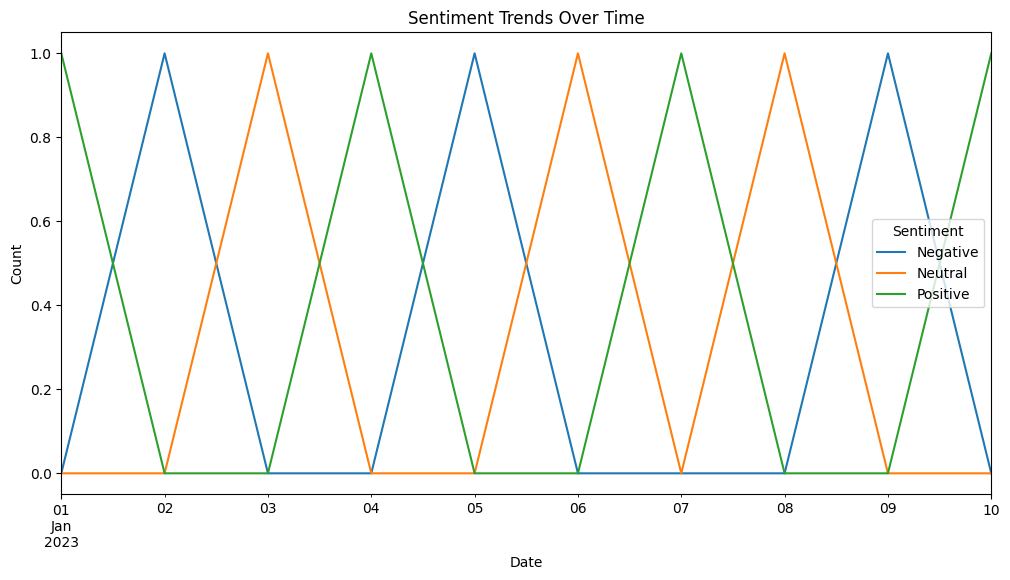

In [23]:
# Sample DataFrame creation
df_sentiments = pd.DataFrame({
    'Timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 
                  'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive']
})

# Convert Timestamp to datetime
df_sentiments['Timestamp'] = pd.to_datetime(df_sentiments['Timestamp'])

# Set Timestamp as index
df_sentiments.set_index('Timestamp', inplace=True)
# Count sentiment occurrences and aggregate by day
df_daily_sentiments = df_sentiments.groupby([pd.Grouper(freq='D'), 'Sentiment']).size().unstack(fill_value=0)

# Plot sentiment trends
plt.figure(figsize=(12, 6))
df_daily_sentiments.plot(title='Sentiment Trends Over Time', xlabel='Date', ylabel='Count', figsize=(12, 6))
plt.show()